In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.optimize import curve_fit

In [2]:
gp_table = pd.read_table('./crab_gp_kaz_10_2016-2018_calib_7types.csv', sep='\t')

In [53]:
gp_table.tail()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type
2618,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442,34,1719.54218,14.425982,./obs_plot/21.03.2018_plot_0531+21.png,./obs_data/21.03.2018_obs_0531+21.csv,1,70581,84.57701,4.97475,11.27610,./gp_plot/21.03.2018_plot_0531+21_18.png,./gp_plot_txt/21.03.2018_plot_0531+21_19.csv,4
2619,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442,34,1719.54218,14.425982,./obs_plot/21.03.2018_plot_0531+21.png,./obs_data/21.03.2018_obs_0531+21.csv,1,64146,80.98981,1.70775,9.80595,./gp_plot/21.03.2018_plot_0531+21_19.png,./gp_plot_txt/21.03.2018_plot_0531+21_20.csv,4
2620,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442,34,1719.54218,14.425982,./obs_plot/21.03.2018_plot_0531+21.png,./obs_data/21.03.2018_obs_0531+21.csv,1,14130,80.70508,7.01415,14.60745,./gp_plot/21.03.2018_plot_0531+21_20.png,./gp_plot_txt/21.03.2018_plot_0531+21_21.csv,4
2621,21.03.2018,18:05:10.8006687,2.4576,6.007525,2442,34,1719.54218,14.425982,./obs_plot/21.03.2018_plot_0531+21.png,./obs_data/21.03.2018_obs_0531+21.csv,1,56806,80.51484,6.22215,9.79110,./gp_plot/21.03.2018_plot_0531+21_21.png,./gp_plot_txt/21.03.2018_plot_0531+21_22.csv,4
2622,07.05.2018,15:00:23.4933052,2.4576,6.007598,2442,34,1719.93488,2.917288,./obs_plot/07.05.2018_plot_0531+21.png,./obs_data/07.05.2018_obs_0531+21.csv,1,76676,152.58199,20.72070,51.43545,./gp_plot/07.05.2018_plot_0531+21_0.png,./gp_plot_txt/07.05.2018_plot_0531+21_1.csv,6


In [3]:
dataset_pulse = pd.DataFrame(columns=[
    'power_a',
    'power_b',
    'power_k',
    'w_10',
    'w_50',
    'type',
])

In [24]:
def power_func(x, a, b, k): 
    return [a**float(i-b) - k for i in x]

def linea_func(x, k, b):
    return k*x + b

In [25]:
for idx, _ in enumerate(gp_table['Date']):
    file = './results_by_08.05.2019/' + gp_table['fName'][idx][2:]
    profile = np.genfromtxt(file, skip_header=6)
    
    if len(profile) == 100:
        pass
    else:
        profile = np.append(profile, np.zeros(100 - len(profile)))
    
    profile = profile/max(profile)
    
    y = profile
    x = range(len(profile))
    
    threshold = 10 
    a = 1
    b = 1 
    k = 1 
    #popt_power_1, pcov = curve_fit(linea_func,x[:threshold +1],y[:threshold+1],p0=[b, k], maxfev=200000) 
    popt_power_2, pcov = curve_fit(power_func,x[threshold:],y[threshold:],p0=[a, b, k], maxfev=200000)

    dataset_pulse.loc[idx] = [
        popt_power_2[0],
        popt_power_2[1],
        popt_power_2[2],
        gp_table['W10, point'][idx],
        gp_table['W50, point'][idx],
        int(gp_table['Type'][idx])
    ]

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [37]:
dataset_pulse

,power_a,power_b,power_k,w_10,w_50,type
0,0.951802,9.282250,-0.096431,54.61335,19.32975,6.0
1,0.960589,5.053614,-0.099118,63.82035,19.41885,6.0
2,0.946091,8.906292,-0.076434,39.25350,18.77040,6.0
3,0.951695,8.123937,-0.102338,59.65245,21.39390,6.0
4,0.945931,7.407880,-0.100924,41.72355,12.60765,6.0
...,...,...,...,...,...,...
2618,0.915218,7.102118,0.037088,11.27610,4.97475,4.0
2619,0.767636,8.933279,-0.057258,9.80595,1.70775,4.0
2620,0.908805,7.738985,0.028621,14.60745,7.01415,4.0
2621,0.916727,9.533163,0.072201,9.79110,6.22215,4.0


In [39]:
# reset type to 2 fraction 0 - noise and 1 - pulse
for idx, _ in enumerate(dataset_pulse['power_a']):
    if dataset_pulse['type'][idx] < 4:
        dataset_pulse['type'][idx] = 0
    else:
        dataset_pulse['type'][idx] = 1

In [40]:
corr = dataset_pulse.corr()
corr.style.background_gradient(cmap='coolwarm')

,power_a,power_b,power_k,w_10,w_50,type
power_a,1,0.147814,0.133156,0.385784,0.195275,0.318839
power_b,0.147814,1,0.885116,0.347989,0.466321,-0.200063
power_k,0.133156,0.885116,1,0.277642,0.374769,-0.185682
w_10,0.385784,0.347989,0.277642,1,0.681938,0.0119551
w_50,0.195275,0.466321,0.374769,0.681938,1,-0.299527
type,0.318839,-0.200063,-0.185682,0.0119551,-0.299527,1


In [41]:
X = dataset_pulse.drop(['type'], axis=1)
y = dataset_pulse['type']

In [29]:
len(X)

2623

In [51]:
# drop unusless column
X = X.drop(['power_b', 'power_k'], axis=1)

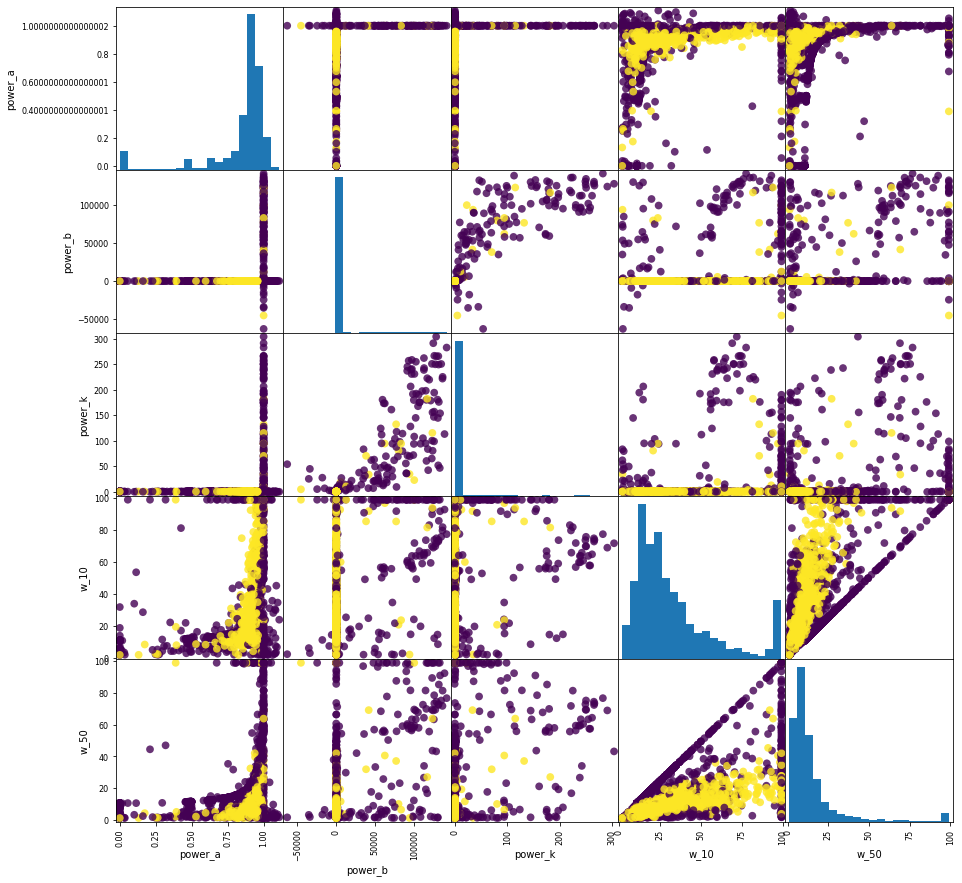

In [42]:
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
print(f'len X_train = {len(X_train)}, len y_train = {len(y_train)}',
      f'len X_test = {len(X_test)}, len y_test = {len(y_test)}', sep='\n') 

len X_train = 1836, len y_train = 1836
len X_test = 787, len y_test = 787


In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.8818297331639136


In [46]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.8932655654383735


In [50]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9224904701397713


In [51]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8005082592121983


In [35]:
data_pulse = dataset_pulse.where(dataset_pulse.type==6, axis=1).dropna()
data_b_pulse = dataset_pulse.where(dataset_pulse.type==5, axis=1).dropna()
data_w_pulse = dataset_pulse.where(dataset_pulse.type==4, axis=1).dropna()
data_un_noise = dataset_pulse.where(dataset_pulse.type==3, axis=1).dropna()
data_st_noise = dataset_pulse.where(dataset_pulse.type==2, axis=1).dropna()
data_nn_noise = dataset_pulse.where(dataset_pulse.type==1, axis=1).dropna()
data_noise = dataset_pulse.where(dataset_pulse.type==0, axis=1).dropna()

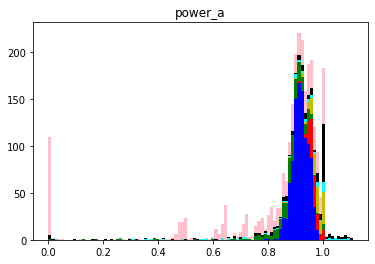

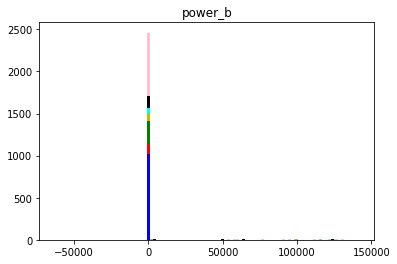

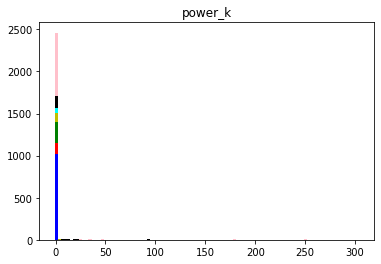

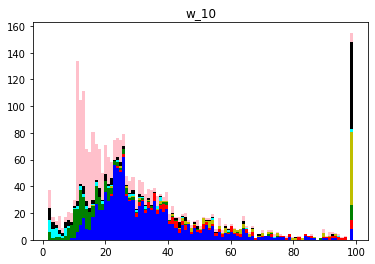

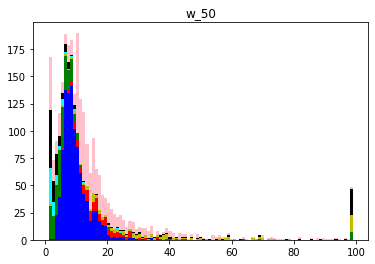

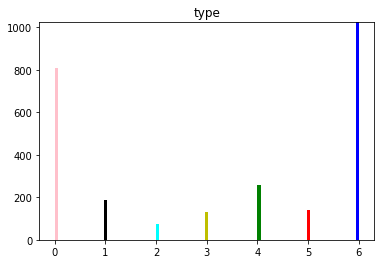

In [36]:
for lbl in data_pulse.columns:
    bins = np.linspace(min(dataset_pulse[lbl]), max(dataset_pulse[lbl]), 100)
    plt.close()
    plt.title(lbl)
    plt.hist([data_pulse[lbl], 
              data_b_pulse[lbl],
              data_w_pulse[lbl],
              data_un_noise[lbl],
              data_st_noise[lbl],
              data_nn_noise[lbl],
              data_noise[lbl],
             ],
             bins=bins, stacked=True, color=['b', 'r', 'g', 'y', 'aqua', 'black', 'pink'])
    plt.show()